# Mengambil *Dataset* dari *Github*

In [1]:
!apt-get install subversion

!svn export --force https://github.com/JasminSalsabilaArifah/GLUCAMERA/trunk/image


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1 libutf8proc2
Suggested packages:
  db5.3-util libapache2-mod-svn subversion-tools
The following NEW packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1 libutf8proc2 subversion
0 upgraded, 6 newly installed, 0 to remove and 15 not upgraded.
Need to get 2,355 kB of archives.
After this operation, 10.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libapr1 amd64 1.6.5-1ubuntu1 [91.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libaprutil1 amd64 1.6.1-4ubuntu2.1 [84.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 libserf-1-1 amd64 1.3.9-8build1 [45.2 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/universe amd64 libutf8proc2 amd64 2.5.0-1 [50.0 kB]
Get:5 http://archive.ubuntu.com/ubuntu focal-

## Memasukan Fungsi *Library*

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # The %tensorflow_version magic only works in colab.
  %tensorflow_version 2.x
except Exception:
  pass
import numpy as np
import math, os, sys
import itertools

import matplotlib.pyplot as plt
plt.style.use('default')
from scipy import ndimage

from skimage import measure, morphology
from skimage.io import imsave, imread
from skimage.filters import threshold_otsu
from skimage.transform import resize

import tensorflow as tf
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
import pandas as pd

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## Mengimpor Dataset

In [39]:
#Perintah di bawah ini untuk melihat list bagian dari file yang sudah diunduh dari Github
!ls data
!ls image/train
!ls image/train/Tinggi
!ls image/train/Sedang
!ls image/train/Rendah

ls: cannot access 'data': No such file or directory
a  Rendah  Sedang  Tinggi
K10.jpg  K19.jpg  K27.jpg  K35.jpg  K43.jpg  K51.jpg  K5.jpg   K68.jpg	K7.jpg
K11.jpg  K1.jpg   K28.jpg  K36.jpg  K44.jpg  K52.jpg  K60.jpg  K69.jpg	K8.jpg
K12.jpg  K20.jpg  K29.jpg  K37.jpg  K45.jpg  K53.jpg  K61.jpg  K6.jpg	K9.jpg
K13.jpg  K21.jpg  K2.jpg   K38.jpg  K46.jpg  K54.jpg  K62.jpg  K70.jpg
K14.jpg  K22.jpg  K30.jpg  K39.jpg  K47.jpg  K55.jpg  K63.jpg  K71.jpg
K15.jpg  K23.jpg  K31.jpg  K3.jpg   K48.jpg  K56.jpg  K64.jpg  K72.jpg
K16.jpg  K24.jpg  K32.jpg  K40.jpg  K49.jpg  K57.jpg  K65.jpg  K73.jpg
K17.jpg  K25.jpg  K33.jpg  K41.jpg  K4.jpg   K58.jpg  K66.jpg  K74.jpg
K18.jpg  K26.jpg  K34.jpg  K42.jpg  K50.jpg  K59.jpg  K67.jpg  K75.jpg
B10.jpg  B19.jpg  B27.jpg  B35.jpg  B43.jpg  B51.jpg  B5.jpg   B68.jpg	B7.jpg
B11.jpg  B1.jpg   B28.jpg  B36.jpg  B44.jpg  B52.jpg  B60.jpg  B69.jpg	B8.jpg
B12.jpg  B20.jpg  B29.jpg  B37.jpg  B45.jpg  B53.jpg  B61.jpg  B6.jpg	B9.jpg
B13.jpg  B21.jpg  B2.jpg   B38

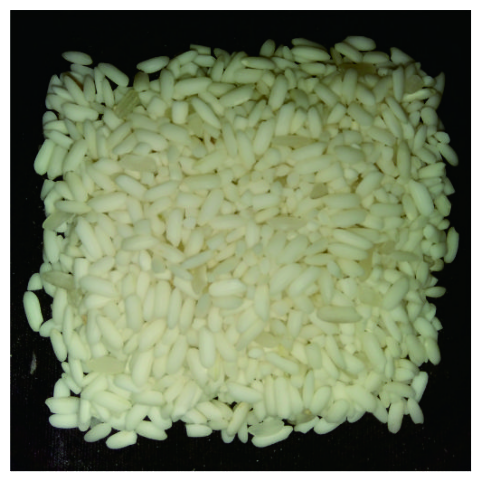

In [7]:
import matplotlib.pyplot as plt
from PIL import Image

# Path gambar yang ingin ditampilkan
path = "image/train/Tinggi/K3.jpg"

# Membaca gambar menggunakan PIL
image = Image.open(path)

# Menampilkan gambar menggunakan matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis('off')
plt.show()


In [16]:
#Memuat semua gambar ke memori untuk pertama kali

#Memuat dataset pelatihan
IMAGE_SIZE = 224
BATCH_SIZE = 128
base_dir = os.path.join('image/train')

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training')

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation')

#Memuat dataset pengujian
X_test = []
y_test = []
labels = ['Rendah', 'Sedang', 'Tinggi']

for i,label in enumerate(labels):
    folder = os.path.join("image/test",label)
    files = sorted(os.listdir(folder))
    files = [x for x in files if x.endswith(".jpg")]
    for k,file in enumerate(files):
        image_path = os.path.join(folder, file)

        image = imread(image_path)/255.
        image = resize(image,(224,224))
        X_test.append(image)
        category = os.path.split(folder)[-1]
        y_test.append(i)

X_test = np.array(X_test)
y_test = np.array(y_test)

#Menampilkan bentuk dari masing-masing dataset
for image_batch, label_batch in train_generator:
  break
print("Bentuk array dari dataset train (pelatihan) adalah:", image_batch.shape,label_batch.shape)
for image_batch, label_batch in val_generator:
  break
print("Bentuk array dari dataset validation (validasi) adalah:", image_batch.shape,label_batch.shape)
print("Bentuk array dari dataset test (pengujian) adalah:", X_test.shape,y_test.shape)

Found 180 images belonging to 3 classes.
Found 45 images belonging to 3 classes.
Bentuk array dari dataset train (pelatihan) adalah: (128, 224, 224, 3) (128, 3)
Bentuk array dari dataset validation (validasi) adalah: (45, 224, 224, 3) (45, 3)
Bentuk array dari dataset test (pengujian) adalah: (45, 224, 224, 3) (45,)


## Menyimpan Label

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data generator for training data
train_datagen = ImageDataGenerator(rescale=1./255)

# Provide the path to the training data directory and specify the batch size
train_generator = train_datagen.flow_from_directory(
    'image/train',
    target_size=(224, 224),  # adjust the target size as needed
    batch_size=32,
    class_mode='categorical'
)

print(train_generator.class_indices)

labels_txt = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
    f.write(labels_txt)


Found 225 images belonging to 3 classes.
{'Rendah': 0, 'Sedang': 1, 'Tinggi': 2}


In [22]:
!cat labels.txt

Rendah
Sedang
Tinggi

# Membuat Model dari Jaringan CNN yang Sudah dipelajari Sebelumnya (*pre-trained convnets*)

In [23]:
IMG_SHAPE = (224, 224, 3)
# Membuat model dasar (base model) dari pre-trained model VGG-16Net
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                              include_top=False,
                                              weights='imagenet')

58889256/58889256 [==============================] - 0s 0us/step


## *Feature Extraction*

In [24]:
base_model.trainable = False
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [25]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras import layers
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split

## Mempersiapkan Data Masukkan Pengujian

In [26]:
y_test2 = to_categorical(y_test)
X_test3, y_test3 = (X_test, y_test2)

## Pembuatan Model (Menambah Model)

In [27]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile("adam",loss="categorical_crossentropy",metrics=["acc"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 conv2d (Conv2D)             (None, 5, 5, 32)          147488    
                                                                 
 global_average_pooling2d (G  (None, 32)               0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
Total params: 14,862,275
Trainable params: 147,587
Non-trainable params: 14,714,688
_________________________________________________________________


## Pelatihan

In [28]:
#from keras.callbacks import EarlyStopping, ModelCheckpoint

#Menyimpan file model bobot yang terbaik selama pelatihan (dalam format keras ".h5")
history = model.fit_generator(train_generator,
                    epochs=100,
                    validation_data=val_generator)
#history = model.fit(x = X_train3, y = y_train3, batch_size=120, epochs= 100,validation_data=(X_valid3,y_valid3),callbacks = [ckpt])

<ipython-input-28-04411161379f>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/100
8/8 [==============================] - 29s 2s/step - loss: 1.2630 - acc: 0.3867 - val_loss: 0.9562 - val_acc: 0.3556
Epoch 2/100
8/8 [==============================] - 3s 407ms/step - loss: 0.8993 - acc: 0.5822 - val_loss: 0.7273 - val_acc: 0.6889
Epoch 3/100
8/8 [==============================] - 3s 396ms/step - loss: 0.7310 - acc: 0.7422 - val_loss: 0.5915 - val_acc: 0.8222
Epoch 4/100
8/8 [==============================] - 4s 477ms/step - loss: 0.6301 - acc: 0.7778 - val_loss: 0.5575 - val_acc: 0.8000
Epoch 5/100
8/8 [==============================] - 4s 505ms/step - loss: 0.5649 - acc: 0.7956 - val_loss: 0.4296 - val_acc: 0.9111
Epoch 6/100
8/8 [==============================] - 3s 389ms/step - loss: 0.4891 - acc: 0.8311 - val_loss: 0.4218 - val_acc: 0.8889
Epoch 7/100
8/8 [==============================] - 3s 381ms/step - loss: 0.4579 - acc: 0.8356 - val_loss: 0.3531 - val_acc: 0.9111
Epoch 8/100
8/8 [==============================] - 3s 431ms/step - loss: 0.4367 - acc

## Menggambarkan Hasil Pelatihan

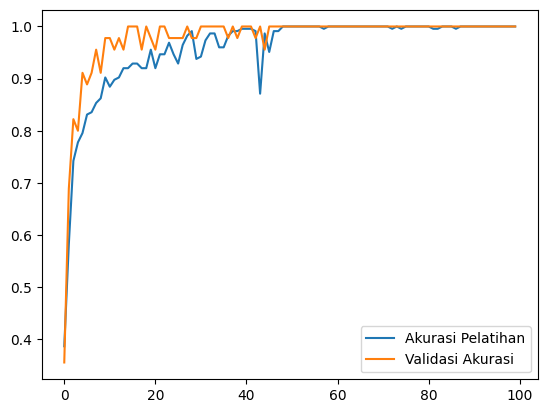

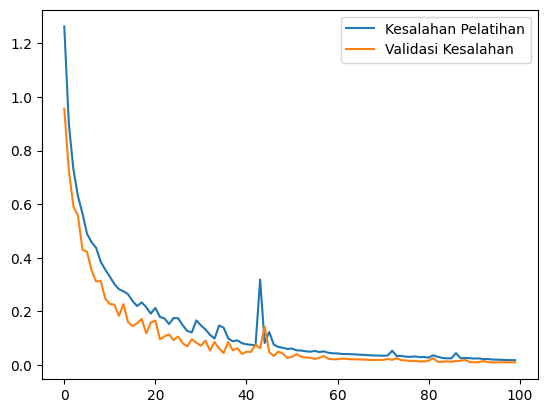

In [29]:
plt.plot(history.history["acc"],label="Akurasi Pelatihan")
plt.plot(history.history["val_acc"],label="Validasi Akurasi")
plt.legend()
plt.show()

plt.plot(history.history["loss"],label="Kesalahan Pelatihan")
plt.plot(history.history["val_loss"],label="Validasi Kesalahan")
plt.legend()
plt.show()

In [30]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 4


## Menggunakan Model

In [31]:
print(train_generator)

In [32]:
#Prediksi Label Validasi dengan Pelatihan
n = 44
input_image = image_batch[n][np.newaxis,...]
print("Labelnya adalah: ", label_batch[n])

predictions = model.predict(input_image)
print("Prediksinya adalah",predictions[0])

Labelnya adalah:  [0. 0. 1.]
1/1 [==============================] - 0s 180ms/step
Prediksinya adalah [0.   0.07 0.93]


## Evaluasi

In [33]:
#Memeriksa matriks model
print(model.metrics_names)
#Evaluasi data test
print(model.evaluate(x= X_test3, y = y_test3))

['loss', 'acc']
2/2 [==============================] - 3s 2s/step - loss: 0.0822 - acc: 0.9556
[0.08222834020853043, 0.9555555582046509]


In [34]:
#Menampilkan matriks yang benar dan matriks hasil prediksi

#Label yang benar
y_true = np.argmax(y_test2,axis=1)

#Label prediksi
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print(y_true)
print(y_pred)

2/2 [==============================] - 0s 119ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]


## Prediksi Gambar Individual

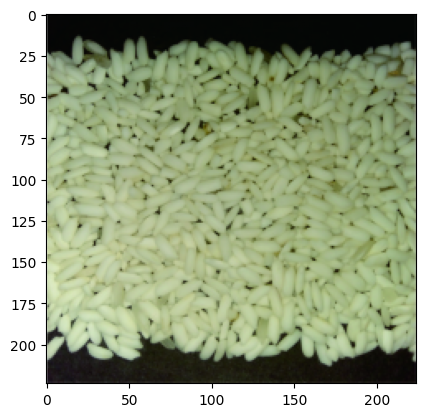

Label yang benar adalah: 2 : Tinggi
1/1 [==============================] - 0s 26ms/step
Nilai yang diprediksi adalah: [0.   0.   0.99]
Label yang diprediksi adalah: 2 : Tinggi
Prediksi benar


In [35]:
n = 44 #Jangan melampaui (nilai dari gambar test - 1)

plt.imshow(X_test[n])
plt.show()

true_label = np.argmax(y_test2,axis=1)[n]
print("Label yang benar adalah:",true_label,":",labels[true_label])
prediction = model.predict(X_test[n][np.newaxis,...])[0]
print("Nilai yang diprediksi adalah:",prediction)
predicted_label = np.argmax(prediction)
print("Label yang diprediksi adalah:",predicted_label,":",labels[predicted_label])

if true_label == predicted_label:
    print("Prediksi benar")
else:
    print("Prediksi salah")

## *Confusion Matrix*

Normalized confusion matrix
[[0.87 0.   0.13]
 [0.   1.   0.  ]
 [0.   0.   1.  ]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Label Prediksi', ylabel='Label Benar'>

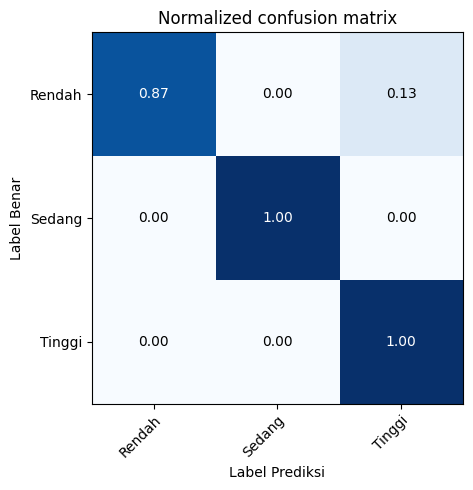

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    #ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Label Benar',
           xlabel='Label Prediksi')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

plot_confusion_matrix(y_true, y_pred, classes=labels, normalize=True,
                      title='Normalized confusion matrix')

# Menyimpan dan Konversi ke ".tflite"

Menyimpan model menggunakan tf.saved_model.save dan kemudian mengonversi model tersimpan ke format yang kompatibel tf lite.

In [37]:
import tensorflow as tf
from google.colab import files

saved_model_dir = 'save/model'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

tflite_file_path = 'Klasifikasi_Glukosa.tflite'

with open(tflite_file_path, 'wb') as f:
    f.write(tflite_model)

files.download(tflite_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
from google.colab import files

tflite_model_path = 'Klasifikasi_Glukosa.tflite'

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

# Convert TFLite model to Keras model
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
model = converter.convert()

# Save the converted model in HDF5 format
h5_model_path = 'Klasifikasi_Glukosa.h5'
with open(h5_model_path, 'wb') as f:
    f.write(model)

files.download(h5_model_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
'''import zipfile

h5_model_path = 'Klasifikasi_Glukosa.h5'
compressed_file_path = 'Klasifikasi_Glukosa.zip'

with zipfile.ZipFile(compressed_file_path, 'w', compression=zipfile.ZIP_DEFLATED) as zipf:
    zipf.write(h5_model_path, arcname='Klasifikasi_Glukosa.h5')

